In [1]:
! pip install duckduckgo_search fastai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 31.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: aiofiles
    Found existing installation: aiofiles 22.1.0
    Uninstalling aiofiles-22.1.0:
      Successfully uninstalled aiofiles-22.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ypy-websocket 0.8.2 requires aiofiles<23,>=22.1.0, but you have aiofiles 23.1.0 which is incompatible.


In [35]:
from duckduckgo_search import ddg_images
from fastdownload import download_url
from fastai.vision.all import *
from time import sleep
from fastcore.all import *

print('Think of two images of animals or items you want to train you model with\n')
sleep(2.7)
input("Are you done thinking of the two images you would like to work on with your model?\n")
sleep(2.7)
print("\nwrite the name of the first image (eg. bird, tree, fish) below")
first_image_name = input('\n')
sleep(2.7)
print("\nwrite the name of the second image (eg. bird, tree, fish) below")
second_image_name = input('\n')
sleep(3)

def search_for_images(what_to_search):
    print(f'Searching for {what_to_search} from duckdcukgo search engine')
    return L(ddg_images(what_to_search, max_results=50)).itemgot('image')

url_link_1 = search_for_images(first_image_name)
url_link_2 = search_for_images(second_image_name)
file_name_1 = f'{first_image_name}.jpg'
file_name_2 = f'{second_image_name}.jpg'
download_url(url_link_1[0], file_name_1, show_progress=True)
download_url(url_link_2[0], file_name_2, show_progress=True)

print('URL for both files have been downloaded')

Think of two images of animals or items you want to train you model with



Are you done thinking of the two images you would like to work on with your model?
 yes



write the name of the first image (eg. bird, tree, fish) below



 X-ray of lung cancer



write the name of the second image (eg. bird, tree, fish) below



 X-ray of a healthy lung


Searching for X-ray of lung cancer from duckdcukgo search engine
Searching for X-ray of a healthy lung from duckdcukgo search engine


URL for both files have been downloaded


Here is a sample of the downloaded image containing X-ray of lung cancer


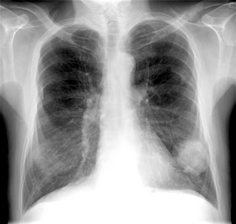

In [38]:
print(f'Here is a sample of the downloaded image containing {first_image_name}')
access_image_1 = Image.open(file_name_1)
access_image_1.to_thumb(236, 236)

Here is a sample of the downloaded image containing X-ray of a healthy lung


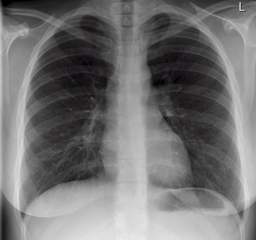

In [39]:
print(f'Here is a sample of the downloaded image containing {second_image_name}')
access_image_2 = Image.open(file_name_2)
access_image_2.to_thumb(256,256)

In [40]:
search = first_image_name, second_image_name
main_directory = Path('main_directory')

for all_search in search:
    path = (main_directory/all_search)
    path.mkdir(exist_ok=True, parents=True)
    download_images(path, urls=search_for_images(f'{all_search}'))
    sleep(10)

    
    resize_images(main_directory/all_search, max_size=400, dest=main_directory/all_search)
    

Searching for X-ray of lung cancer from duckdcukgo search engine
Searching for X-ray of a healthy lung from duckdcukgo search engine


In [41]:
unwanted_downloads = (verify_images(get_image_files(main_directory)))
unwanted_downloads.map(Path.unlink)
len(unwanted_downloads)

1

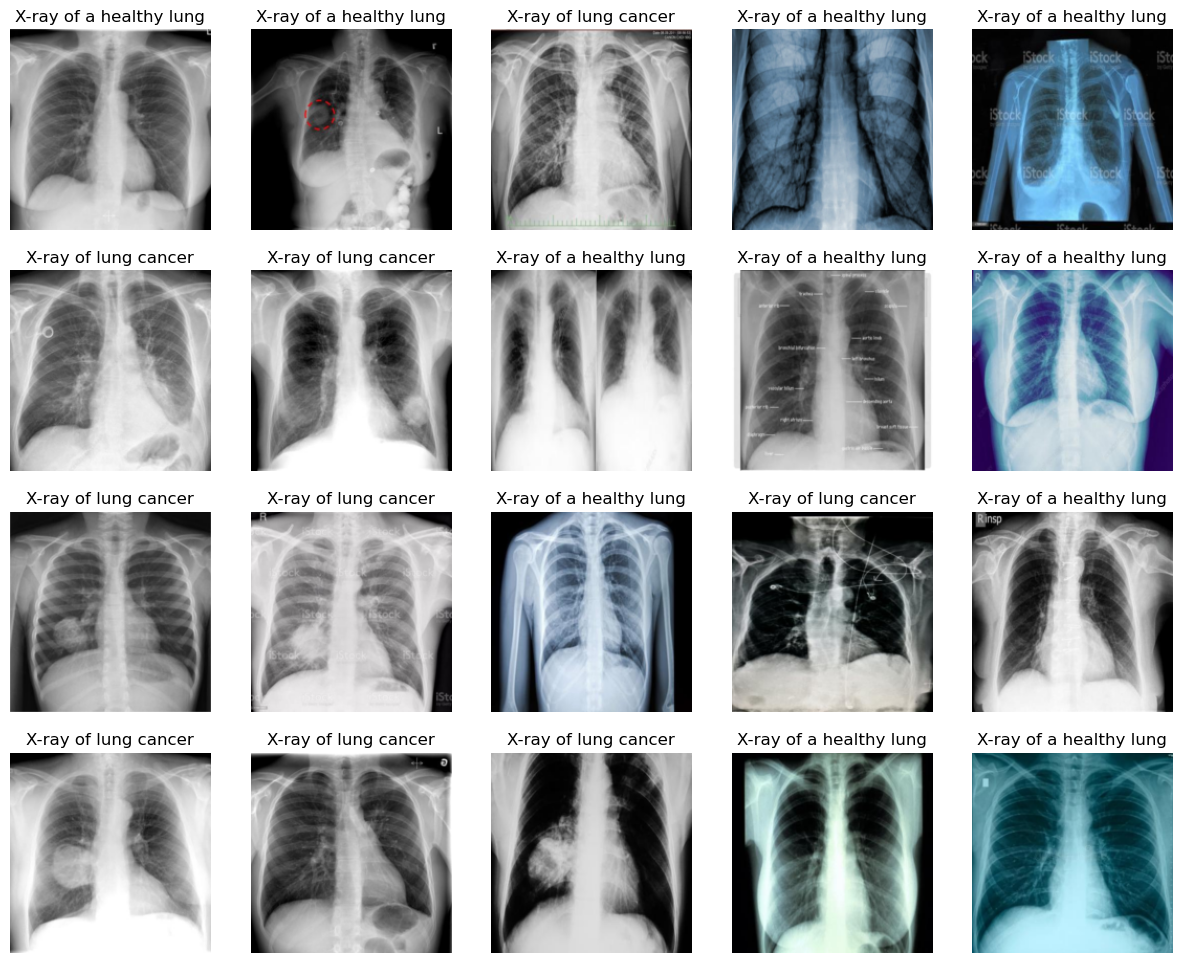

In [62]:
model_dataLoaders = DataBlock ( 
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]).dataloaders(main_directory, bs=32)

model_dataLoaders.show_batch(max_n = 20)

In [63]:
learn = vision_learner(model_dataLoaders, resnet18, metrics=error_rate)
learn.fine_tune(10)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.122483,1.791792,0.375000,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.912828,1.314643,0.437500,00:06
1,0.854099,1.084020,0.437500,00:06
2,0.674730,1.031335,0.500000,00:06
3,0.540606,1.059793,0.500000,00:06
4,0.430649,1.095762,0.500000,00:06
5,0.385305,1.111118,0.375000,00:06
6,0.333055,1.097558,0.375000,00:06
7,0.314960,1.091594,0.312500,00:06
8,0.292430,1.098541,0.312500,00:06
9,0.266178,1.129349,0.312500,00:06


In [74]:
is_lungCancer,_,probs = learn.predict(PILImage.create(f'{first_image_name}.jpg'))
print(f'Probability of the image "{is_lungCancer}" certainty is: {probs[0]:.4f}')

if 0.7000 <= probs[0] <= 1.0000:
    print(f'The downloaded image is a {is_lungCancer}')
elif 0.4000 <= probs[0] <= 0.6999:
    print(f'The possibility of the image whether '
          f'it is a {is_lungCancer} or not is not certian')
else:
    print(f'The downloaded image is not a {is_lungCancer}')

Probability of the image "X-ray of lung cancer" certainty is: 0.0006
The downloaded image is not a X-ray of lung cancer


In [76]:
is_healthyLung,_,probs = learn.predict(PILImage.create(f'{second_image_name}.jpg'))
print(f'Probability of the image "{is_healthyLung}" certainty is: {probs[0]:.4f}')

if 0.7000 <= probs[0] <= 1.0000:
    print(f'The downloaded image is a {is_healthyLung}')
elif 0.4000 <= probs[0] <= 0.6999:
    print(f'The possibility of the image whether '
          f'it is a {is_healthyLung} or not is not certian')
else:
    print(f'The downloaded image is not a {is_healthyLung}')

Probability of the image "X-ray of a healthy lung" certainty is: 0.9989
The downloaded image is a X-ray of a healthy lung
